Берем код из конспекта и будем разбираться

In [17]:
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense

In [18]:
# set hyperfeathers
max_features = 10000  # кількість слів, що розглядаються як особливості
maxlen = 500  # обмеження кількості слів в тексті
batch_size = 32

In [19]:
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
# Завантаження тренувальних та тестових даних зі вказанням обмеження на кількість слів
# в словаре слова расположены по частоте употебления - значит мы ограничиваем свой датасет первыми 10000 наиболее часто употребительныи словами
# Переменные train_data и test_data — это списки отзывов; каждый отзыв — это список индексов слов (кодированное представление последовательности слов).
# Переменные train_labels и test_labels — это списки нулей и единиц, где нули соответствуют отрицательным отзывам, а единицы — положительным:

In [12]:
# декодируем один отзыв - ради интереса
word_index = imdb.get_word_index()
reverse_word_index = dict( [(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join( [reverse_word_index.get(i - 3, '?') for i in input_train[0]])  # посмотрим отзыв с индексом 0
# индексы смещены на 3, потому что есть три служебных зарезервированых слова «padding» (отступ), «start of sequence» (начало последовательности) и «unknown» (неизвестно)
print(decoded_review)

1641221/1641221 [==============================] - 0s 0us/step
? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amaz

In [20]:
input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)
# Застосування заздалегідь обраної максимальної довжини до послідовних даних тренувального та тестового наборів
# не совсем понятно что делает эта процедура - разобраться

In [5]:
model = Sequential()
# Створення порожньої моделі Sequential

# Додавання Embedding шару для перетворення слів в вектори фіксованої довжини
model.add(Embedding(max_features, 32))
# Параметри: кількість слів для розгляду як особливості та розмір вектора, що представляє кожне слово

# Додавання SimpleRNN шару з 32 вузлами
model.add(SimpleRNN(32))
# Параметр: кількість вузлів (розмір прихованого стану)

# Додавання Dense шару з одним вузлом та активацією sigmoid
model.add(Dense(1, activation='sigmoid'))
# Параметри: кількість вузлів (вихідний розмір) та функція активації (sigmoid для бінарної класифікації)
# здесь все по стандарту - постороение последовательной модели

In [6]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
# по стандарту

In [7]:
model.summary()
# по стандарту

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


In [8]:
history = model.fit(input_train, y_train, epochs=5, batch_size=128, validation_split=0.3)
# Запускаємо навчання моделі на тренувальних даних для 5 епох з розміром пакету 128 та розбиттям на тренувальну та валідаційну підмножини
# по стандарту

Epoch 1/5
137/137 [==============================] - 32s 221ms/step - loss: 0.6707 - acc: 0.5779 - val_loss: 0.6165 - val_acc: 0.6836
Epoch 2/5
137/137 [==============================] - 27s 199ms/step - loss: 0.4564 - acc: 0.8038 - val_loss: 0.3947 - val_acc: 0.8333
Epoch 3/5
137/137 [==============================] - 27s 200ms/step - loss: 0.3233 - acc: 0.8689 - val_loss: 0.3854 - val_acc: 0.8275
Epoch 4/5
137/137 [==============================] - 27s 197ms/step - loss: 0.2545 - acc: 0.9014 - val_loss: 0.3953 - val_acc: 0.8269
Epoch 5/5
137/137 [==============================] - 29s 213ms/step - loss: 0.1897 - acc: 0.9301 - val_loss: 0.4173 - val_acc: 0.8263


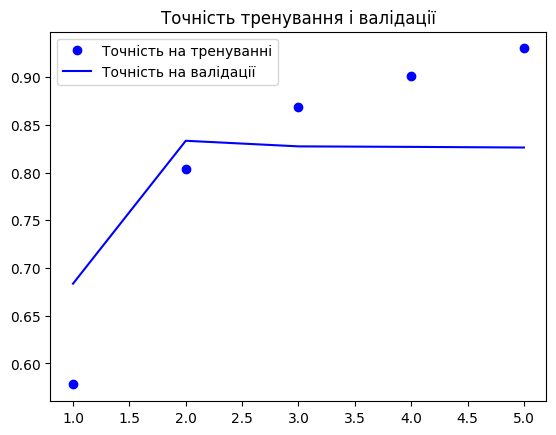

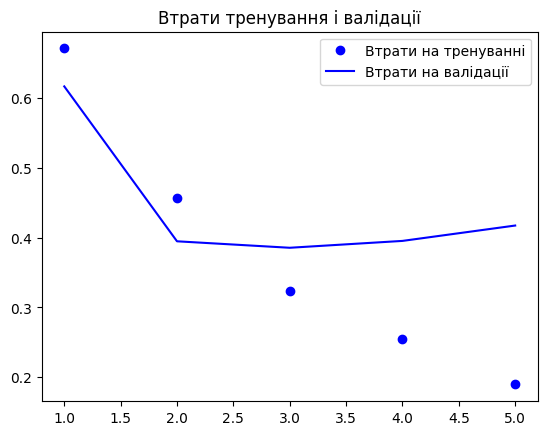

In [9]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні')  # Графік точності на тренувальних данних
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')  # Графік точності на валідаційних данних
plt.title('Точність тренування і валідації')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.figure()

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')  # Графік втрат на тренувальних данних
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації')  # Графік втрат на валідаційних данних
plt.title('Втрати тренування і валідації')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.show()  # Відобразити графіки

# по стандарту - отображение делали много раз

In [10]:
predictions = model.predict(input_test)

# Для отримання зрозумілішого вигляду прогнозів, їх можна перетворити в бінарний формат:
binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

# Для порівняння можна вивести деякі прогнозовані значення поряд з фактичними значеннями
# посмотрим первіе 10 предсказаний
for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")

# Додатковий крок: Оцінка моделі
# Це дасть загальну точність моделі на тестових даних
test_loss, test_acc = model.evaluate(input_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

782/782 [==============================] - 22s 28ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 [==============================] - 24s 30ms/step - loss: 0.4174 - acc: 0.8248
Test Loss: 0.4173644483089447
Test Accuracy: 0.8247600197792053


Пробуем все тоже, но с LSTM моделью

In [21]:
from keras.layers import LSTM   # сравним с LSTM сеткой
model = Sequential()
# Створення порожньої моделі Sequential

# Додавання Embedding шару для перетворення слів в вектори фіксованої довжини
model.add(Embedding(max_features, 32))
# Параметри: кількість слів для розгляду як особливості та розмір вектора, що представляє кожне слово

# Додавання LSTM шару з 32 вузлами
model.add(LSTM(32))
# Параметр: кількість вузлів (розмір прихованого стану)

# Додавання Dense шару з одним вузлом та активацією sigmoid
model.add(Dense(1, activation='sigmoid'))
# Параметри: кількість вузлів (вихідний розмір) та функція активації (sigmoid для бінарної класифікації)

In [22]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
# по стандарту

In [23]:
model.summary()
# по стандарту

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 32)          320000    
                                                                 
 lstm_1 (LSTM)               (None, 32)                8320      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


In [24]:
history = model.fit(input_train, y_train, epochs=5, batch_size=128, validation_split=0.3)
# Запускаємо навчання моделі на тренувальних даних для 5 епох з розміром пакету 128 та розбиттям на тренувальну та валідаційну підмножини
# по стандарту

Epoch 1/5
137/137 [==============================] - 64s 451ms/step - loss: 0.6125 - acc: 0.6626 - val_loss: 0.5092 - val_acc: 0.7913
Epoch 2/5
137/137 [==============================] - 70s 515ms/step - loss: 0.3916 - acc: 0.8345 - val_loss: 0.3623 - val_acc: 0.8480
Epoch 3/5
137/137 [==============================] - 60s 438ms/step - loss: 0.2922 - acc: 0.8854 - val_loss: 0.3148 - val_acc: 0.8689
Epoch 4/5
137/137 [==============================] - 62s 454ms/step - loss: 0.2434 - acc: 0.9080 - val_loss: 0.3113 - val_acc: 0.8635
Epoch 5/5
137/137 [==============================] - 62s 455ms/step - loss: 0.2109 - acc: 0.9225 - val_loss: 0.2942 - val_acc: 0.8784


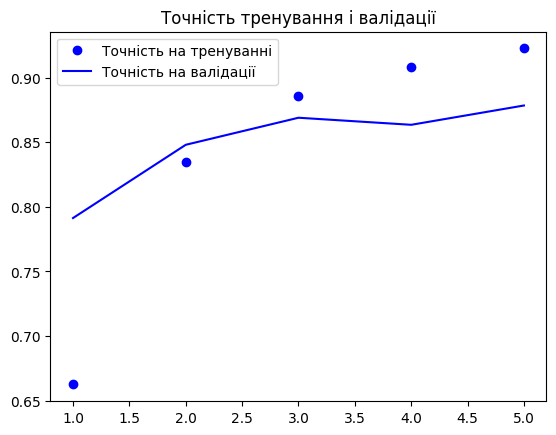

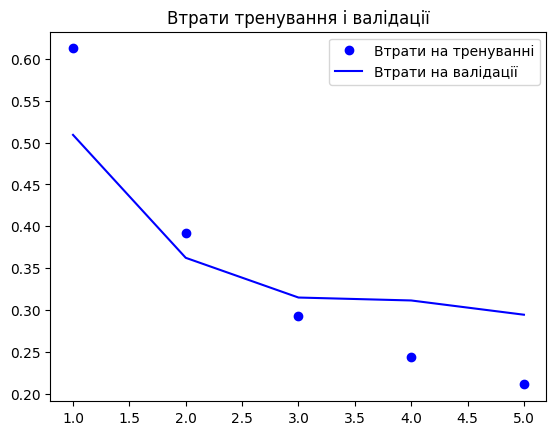

In [25]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні')  # Графік точності на тренувальних данних
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')  # Графік точності на валідаційних данних
plt.title('Точність тренування і валідації')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.figure()

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')  # Графік втрат на тренувальних данних
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації')  # Графік втрат на валідаційних данних
plt.title('Втрати тренування і валідації')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.show()  # Відобразити графіки

# по стандарту - отображение делали много раз

In [26]:
predictions = model.predict(input_test)

# Для отримання зрозумілішого вигляду прогнозів, їх можна перетворити в бінарний формат:
binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

# Для порівняння можна вивести деякі прогнозовані значення поряд з фактичними значеннями
# посмотрим первіе 10 предсказаний
for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")

# Додатковий крок: Оцінка моделі
# Це дасть загальну точність моделі на тестових даних
test_loss, test_acc = model.evaluate(input_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

782/782 [==============================] - 43s 54ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 [==============================] - 43s 55ms/step - loss: 0.3065 - acc: 0.8710
Test Loss: 0.3064979314804077
Test Accuracy: 0.870959997177124


пробуем дальше - с моделью глубокой RNN

In [27]:
from keras.layers import Bidirectional
model = Sequential()
# Створення порожньої моделі Sequential

# Додавання Embedding шару для перетворення слів в вектори фіксованої довжини
model.add(Embedding(max_features, 32))
# Параметри: кількість слів для розгляду як особливості та розмір вектора, що представляє кожне слово

# Додавання декількох Bidirectional LSTM шару з 32 вузлами
model.add(Bidirectional(LSTM(32, return_sequences=True)))
model.add(Bidirectional(LSTM(32)))
# Параметр: кількість вузлів (розмір прихованого стану) і return_sequences=True для першого шару, щоб надати послідовність як вхід на наступний шар

# Додавання Dense шару з одним вузлом та активацією sigmoid
model.add(Dense(1, activation='sigmoid'))
# Параметри: кількість вузлів (вихідний розмір) та функція активації (sigmoid для бінарної класифікації)

In [28]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
# по стандарту

In [29]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 32)          320000    
                                                                 
 bidirectional (Bidirectiona  (None, None, 64)         16640     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               24832     
 nal)                                                            
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 361,537
Trainable params: 361,537
Non-trainable params: 0
_________________________________________________________________


In [30]:
history = model.fit(input_train, y_train, epochs=5, batch_size=128, validation_split=0.3)
# Запускаємо навчання моделі на тренувальних даних для 5 епох з розміром пакету 128 та розбиттям на тренувальну та валідаційну підмножини
# по стандарту

Epoch 1/5
137/137 [==============================] - 262s 2s/step - loss: 0.6393 - acc: 0.6056 - val_loss: 0.4581 - val_acc: 0.7939
Epoch 2/5
137/137 [==============================] - 249s 2s/step - loss: 0.3865 - acc: 0.8358 - val_loss: 0.3281 - val_acc: 0.8704
Epoch 3/5
137/137 [==============================] - 248s 2s/step - loss: 0.2749 - acc: 0.8931 - val_loss: 0.2870 - val_acc: 0.8809
Epoch 4/5
137/137 [==============================] - 229s 2s/step - loss: 0.2330 - acc: 0.9119 - val_loss: 0.3082 - val_acc: 0.8721
Epoch 5/5
137/137 [==============================] - 248s 2s/step - loss: 0.1932 - acc: 0.9294 - val_loss: 0.3221 - val_acc: 0.8853


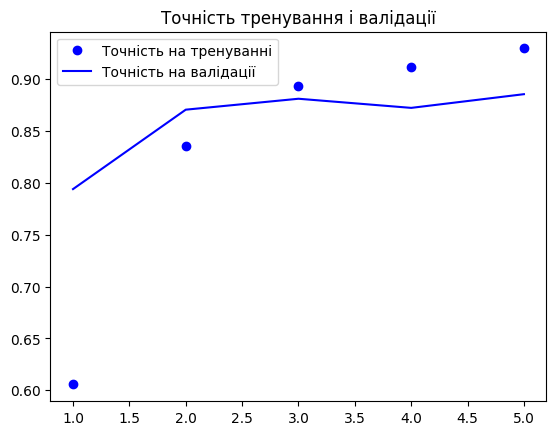

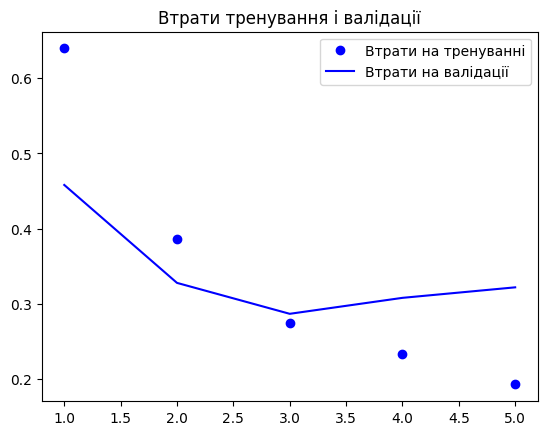

In [31]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні')  # Графік точності на тренувальних данних
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')  # Графік точності на валідаційних данних
plt.title('Точність тренування і валідації')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.figure()

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')  # Графік втрат на тренувальних данних
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації')  # Графік втрат на валідаційних данних
plt.title('Втрати тренування і валідації')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.show()  # Відобразити графіки

# по стандарту - отображение делали много раз

In [32]:
predictions = model.predict(input_test)

# Для отримання зрозумілішого вигляду прогнозів, їх можна перетворити в бінарний формат:
binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

# Для порівняння можна вивести деякі прогнозовані значення поряд з фактичними значеннями
# посмотрим первіе 10 предсказаний
for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")

# Додатковий крок: Оцінка моделі
# Це дасть загальну точність моделі на тестових даних
test_loss, test_acc = model.evaluate(input_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

782/782 [==============================] - 144s 182ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 [==============================] - 143s 183ms/step - loss: 0.3393 - acc: 0.8794
Test Loss: 0.33926472067832947
Test Accuracy: 0.879360020160675


Вывод достаточно очевиден и ясен - мы видим что с усложнением топологии реккурентной сети увеличивается количество обучаемых параметров скрытых слоев (количество нейронов), естественно уввеличивается время обучения сети, но растет и точность предсказаний сети. Поэтому при проектировании нужно выбирать золотую середину между точностью, количеством нейрнов (память) и временем обучения (посокльку реальные сети всегда и постоянно переобучаются, поэтому сетка должна не только лишь вечно обучаться - потреблять ресурсы,  но и делать полезную работу - предсказания и прочее)